In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\narek\\Downloads\\Telegram Desktop\\data.csv"
data = pd.read_csv(file_path)

data.Date = pd.to_datetime(data.Date)
data['Year'] = data['Date'].dt.strftime('%Y')
data['Month'] = pd.to_datetime(data['Date'], format='%m').dt.month_name().str.slice(stop=3)
# Display the first few rows of the dataset to understand its structure
data.head()


,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Year,Month
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN,2002,Oct
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge,2002,Oct
2,Cristiano Ronaldo,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins,2002,Oct
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates,2002,Nov
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN,2002,Dec


Lionel Messi: The dataset begins from the 2004/05 season, with the number of goals scored each season.

Cristiano Ronaldo: The dataset for Ronaldo starts from the 2002/03 season.

Combined Data: This dataset sums the goals scored by both players in each season, starting from the 2002/03 season.

In [2]:
# Data preparation: Aggregating the number of goals per season for each player and combined

# Counting the number of goals per season for each player
goals_per_month = data.groupby(['Player', 'Year', 'Month']).size().reset_index(name='Goals')

# Aggregating data for separate analysis (Messi and Ronaldo)
messi_goals = goals_per_month[goals_per_month['Player'] == 'Lionel Messi'].reset_index(drop=True)
ronaldo_goals = goals_per_month[goals_per_month['Player'] == 'Cristiano Ronaldo'].reset_index(drop=True)

# Creating a combined dataset for both players
combined_goals = goals_per_month.groupby(['Year', 'Month']).sum().reset_index()

messi_goals['Time'] = messi_goals['Year'] + ' ' + messi_goals['Month']
ronaldo_goals['Time'] = ronaldo_goals['Year'] + ' ' + ronaldo_goals['Month']
combined_goals['Time'] = combined_goals['Year'] + ' ' + combined_goals['Month']

# Displaying the first few rows of each dataset for verification
messi_goals.head(), ronaldo_goals.head(), combined_goals.head()


(         Player  Year Month  Goals      Time
 0  Lionel Messi  2005   May      1  2005 May
 1  Lionel Messi  2005   Nov      2  2005 Nov
 2  Lionel Messi  2006   Aug      1  2006 Aug
 3  Lionel Messi  2006   Feb      2  2006 Feb
 4  Lionel Messi  2006   Jan      4  2006 Jan,
               Player  Year Month  Goals      Time
 0  Cristiano Ronaldo  2002   Dec      1  2002 Dec
 1  Cristiano Ronaldo  2002   Nov      1  2002 Nov
 2  Cristiano Ronaldo  2002   Oct      3  2002 Oct
 3  Cristiano Ronaldo  2003   Nov      1  2003 Nov
 4  Cristiano Ronaldo  2004   Apr      1  2004 Apr,
    Year Month  Goals      Time
 0  2002   Dec      1  2002 Dec
 1  2002   Nov      1  2002 Nov
 2  2002   Oct      3  2002 Oct
 3  2003   Nov      1  2003 Nov
 4  2004   Apr      1  2004 Apr)

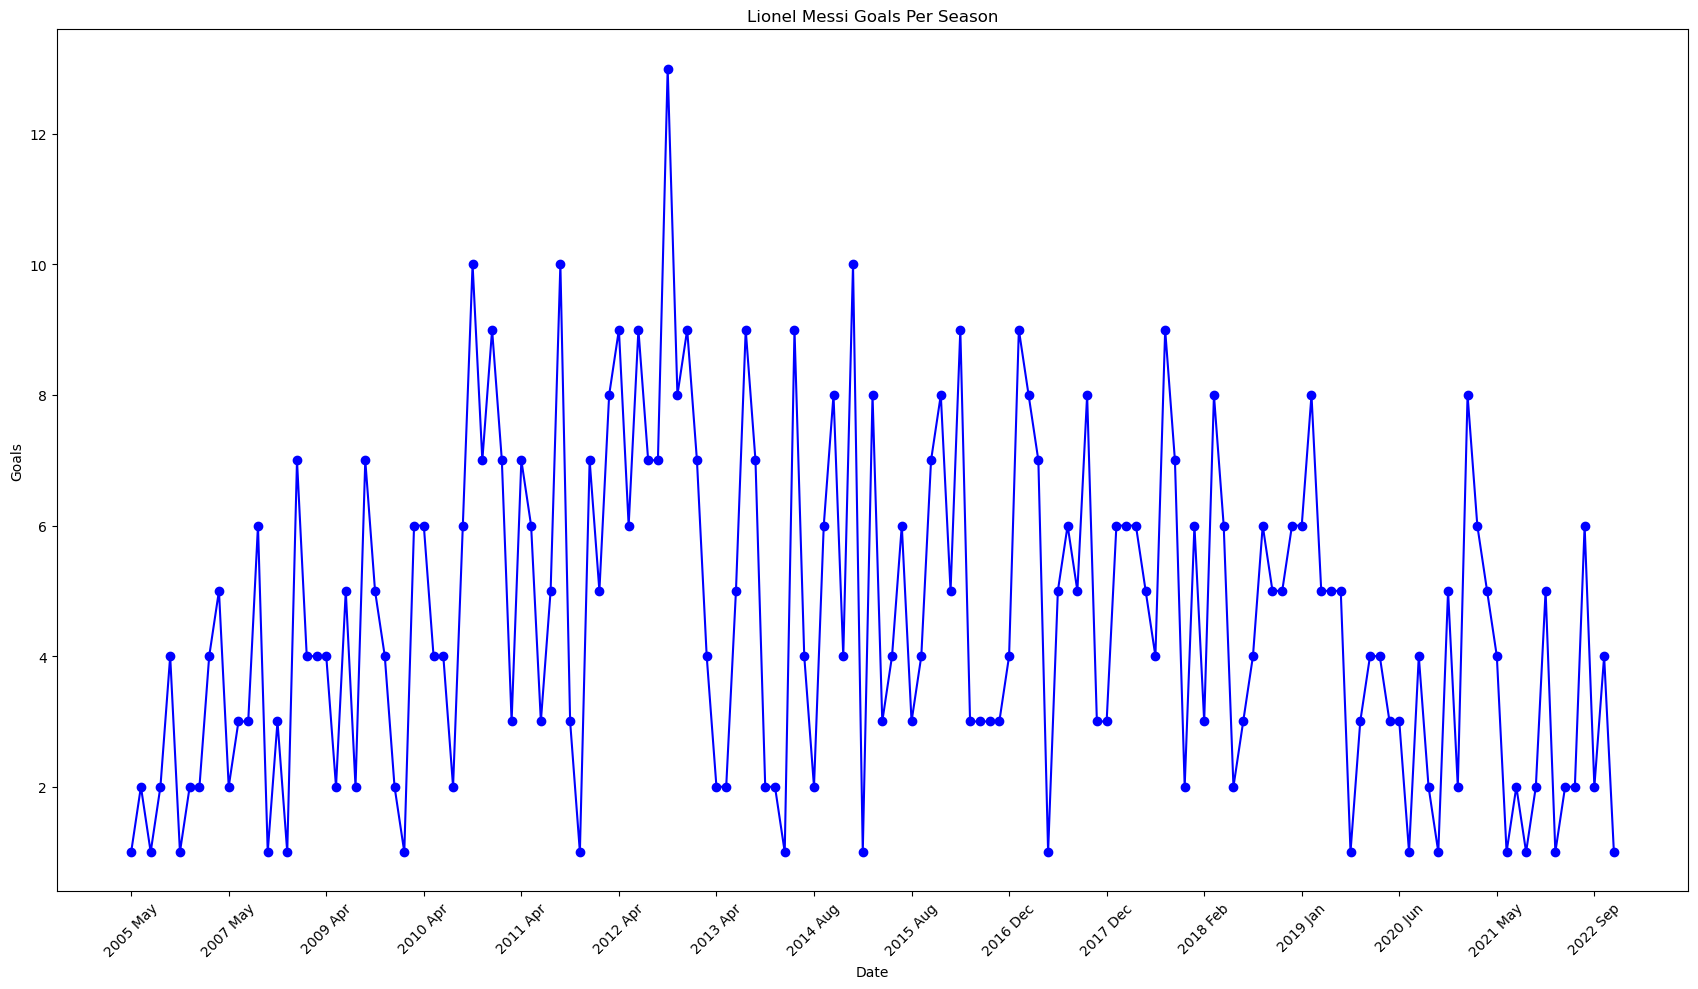

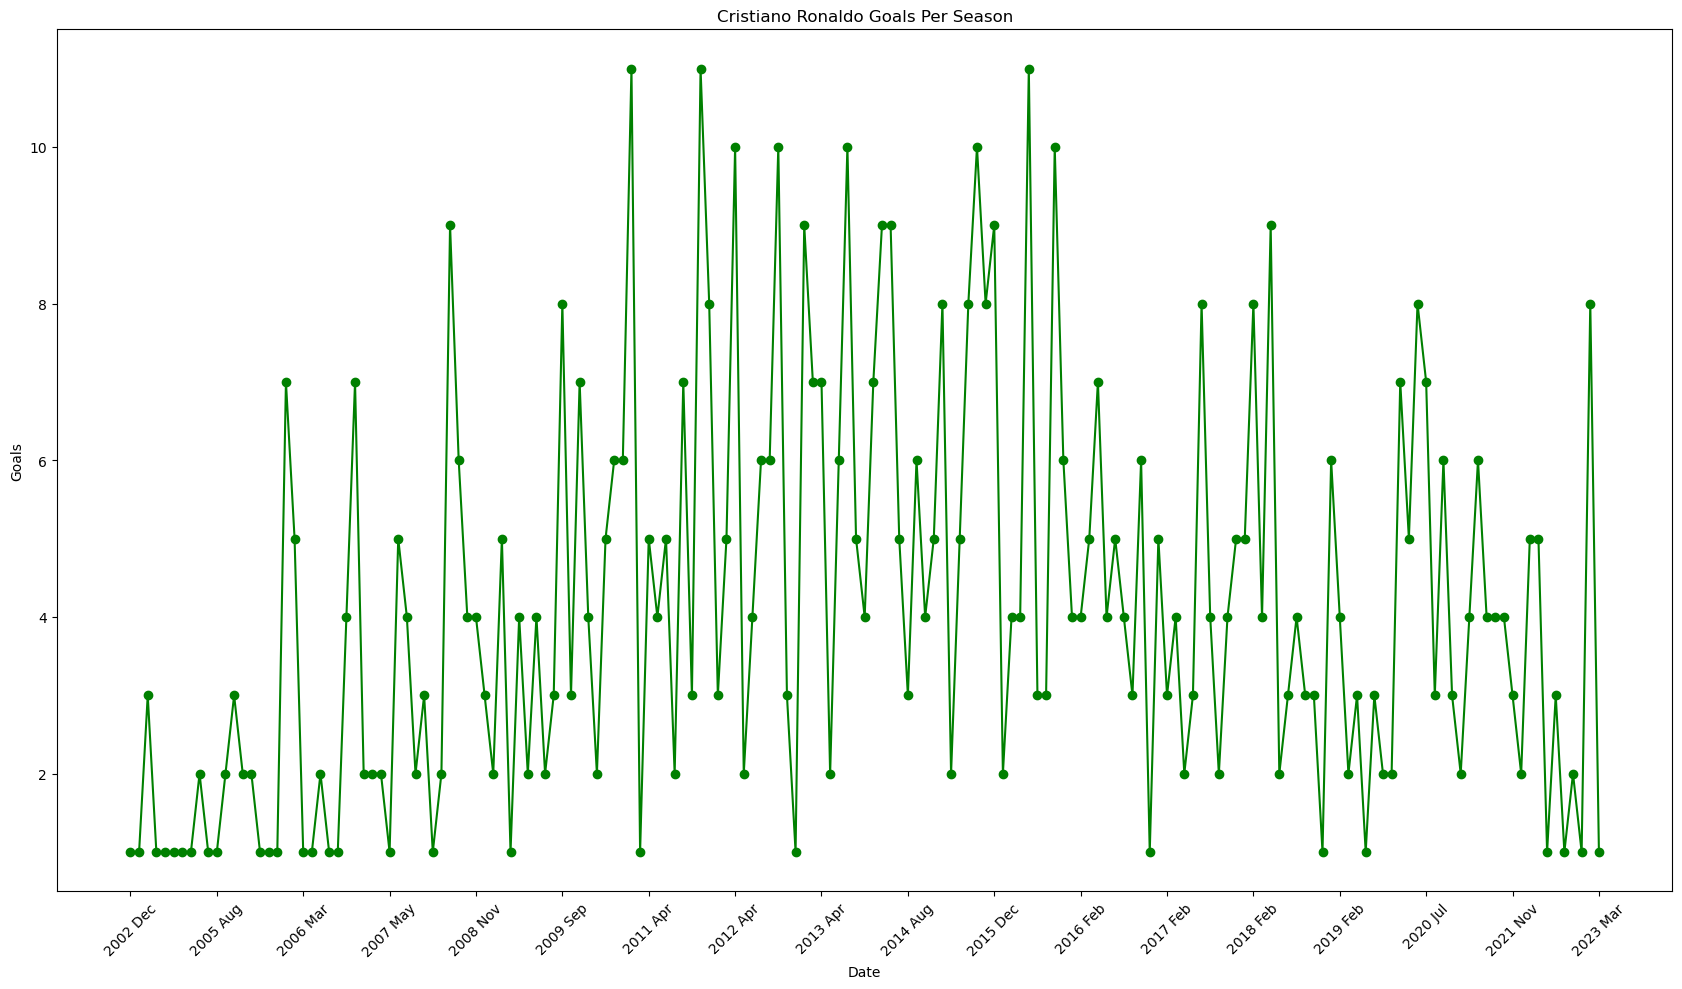

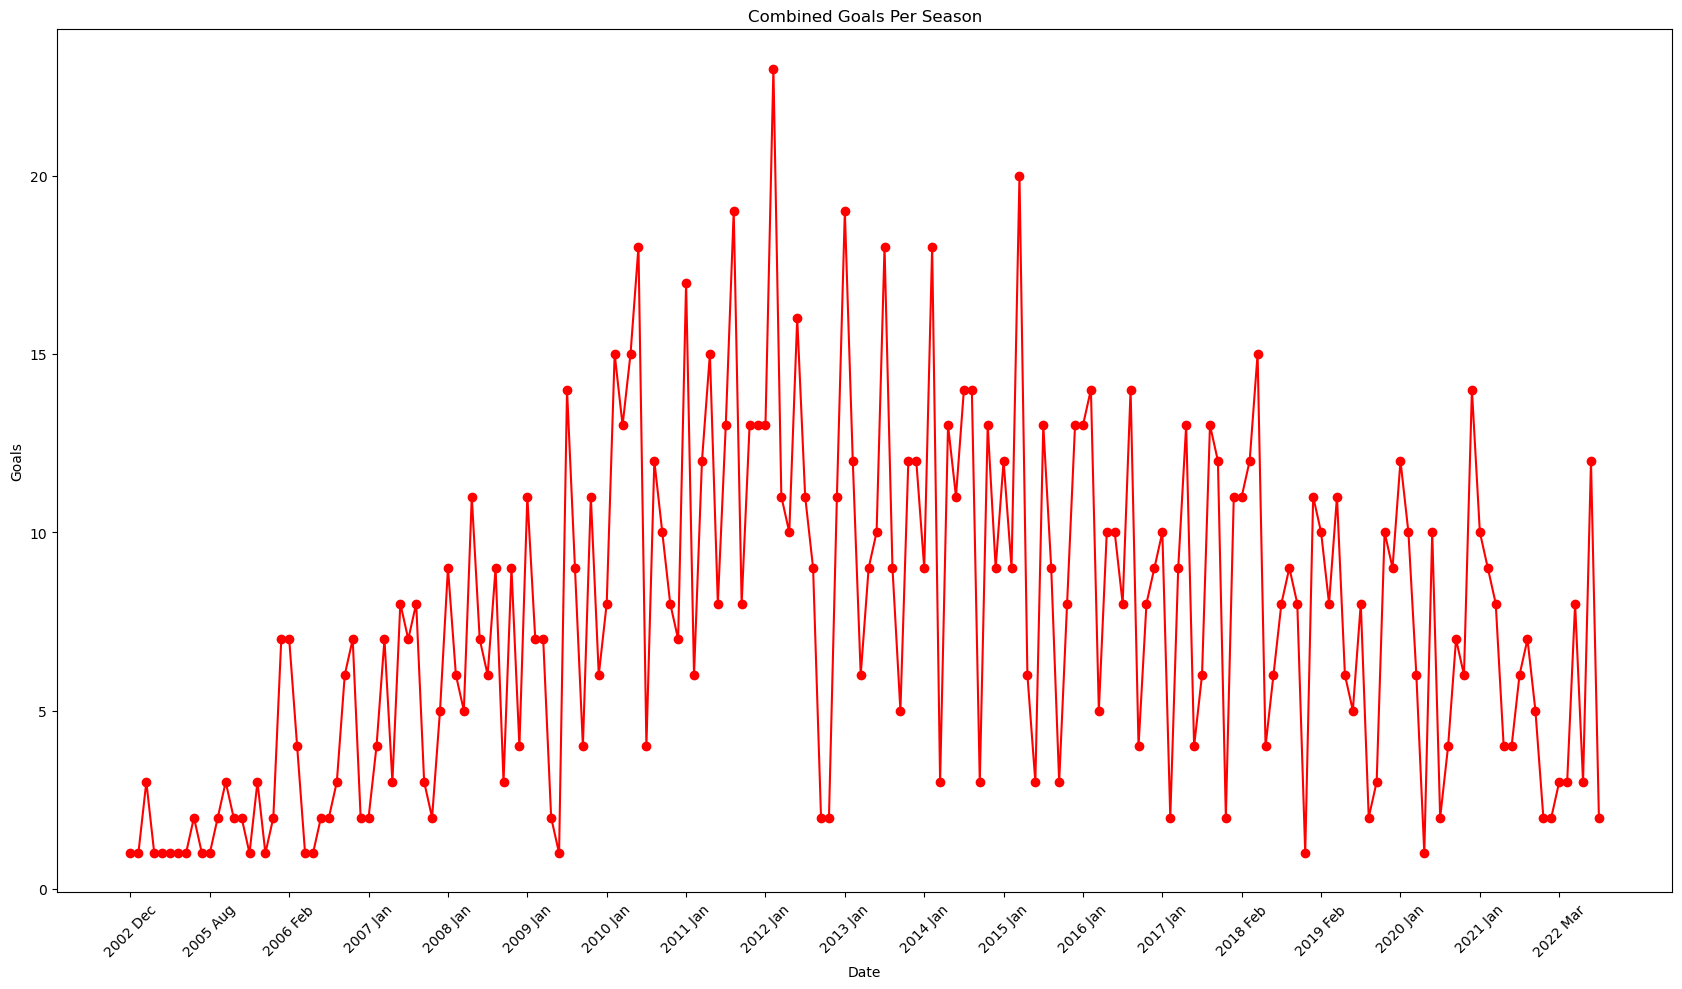

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(50, 10))
# Messi's goals per season
plt.subplot(1, 3, 1)
plt.plot(messi_goals['Time'], messi_goals['Goals'], marker='o', color='blue')
plt.title('Lionel Messi Goals Per Season')
plt.xlabel('Date')
plt.ylabel('Goals')
plt.xticks(ticks=messi_goals['Time'][::10], rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(50, 10))
# Ronaldo's goals per season
plt.subplot(1, 3, 2)
plt.plot(ronaldo_goals['Time'], ronaldo_goals['Goals'], marker='o', color='green')
plt.title('Cristiano Ronaldo Goals Per Season')
plt.xlabel('Date')
plt.ylabel('Goals')
plt.xticks(ticks=ronaldo_goals['Time'][::10], rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(50, 10))
# Combined goals per season
plt.subplot(1, 3, 3)
plt.plot(combined_goals['Time'], combined_goals['Goals'], marker='o', color='red')
plt.title('Combined Goals Per Season')
plt.xlabel('Date')
plt.ylabel('Goals')
plt.xticks(ticks=combined_goals['Time'][::10], rotation=45)
plt.tight_layout()
plt.show()


The plots illustrate the number of goals scored per month by Lionel Messi, Cristiano Ronaldo, and their combined totals. Here are some observations:

Lionel Messi: There appears to be some fluctuation in the number of goals per season, with no clear seasonality but a general upward trend until around the 2011/12 season, after which it fluctuates more noticeably.

Cristiano Ronaldo: There is a significant upward trend in the early seasons, peaking around the 2014/15 season. 

Afterward, there is a noticeable variability with a slight downward trend.

Combined Goals: When combined, the trends of both players seem to amplify the peaks and troughs, although the data still does not exhibit a clear seasonality pattern.

Based on visual inspection, there doesn't seem to be a strong seasonal component, but there are trends and variances that may need to be stabilized.
We will proceed with stationarity checks using the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to confirm if the data needs differencing or other transformations.

The Augmented Dickey-Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests yield the following results for the goal data:

Lionel Messi Goals Per Season: The ADF test indicates non-stationarity (p-value > 0.05), whereas the KPSS test suggests stationarity (p-value > 0.05). The mixed results imply that the series may be difference-stationary or trend-stationary.

Cristiano Ronaldo Goals Per Season: Similar to Messi's results, the ADF test indicates non-stationarity (p-value > 0.05), and the KPSS test suggests stationarity (p-value > 0.05), leading to the same implications as above.

Combined Goals Per Season: The ADF test suggests non-stationarity (p-value > 0.05), and the KPSS test suggests stationarity (p-value > 0.05), indicating a possible difference-stationary or trend-stationary series.

In [4]:
from statsmodels.tsa.stattools import adfuller, kpss

# Function to perform the Augmented Dickey-Fuller test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series, autolag='AIC')  # AIC will choose the best lag length
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, value in result[4].items():
        out[f'Critical value ({key})'] = value
    print(out.to_string())  # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary\n")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary\n")

# Function to perform the KPSS test
def kpss_test(series, title=''):
    print(f'KPSS Test: {title}')
    statistic, p_value, n_lags, critical_values = kpss(series, nlags='auto')
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'# lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'  {key} : {value}')
    
    if p_value < 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is non-stationary\n")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is stationary\n")

# Applying ADF and KPSS tests to Messi's goals
print("Lionel Messi Goals Per Month")
adf_test(messi_goals['Goals'], 'Messi Goals')
kpss_test(messi_goals['Goals'], 'Messi Goals')

# Applying ADF and KPSS tests to Ronaldo's goals
print("\nCristiano Ronaldo Goals Per Month")
adf_test(ronaldo_goals['Goals'], 'Ronaldo Goals')
kpss_test(ronaldo_goals['Goals'], 'Ronaldo Goals')

# Applying ADF and KPSS tests to the combined goals
print("\nCombined Goals Per Month")
adf_test(combined_goals['Goals'], 'Combined Goals')
kpss_test(combined_goals['Goals'], 'Combined Goals')


C:\Users\narek\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Lionel Messi Goals Per Month
Augmented Dickey-Fuller Test: Messi Goals
ADF test statistic       -3.571513
p-value                   0.006330
# lags used               4.000000
# observations          148.000000
Critical value (1%)      -3.475325
Critical value (5%)      -2.881275
Critical value (10%)     -2.577293
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

KPSS Test: Messi Goals
KPSS Statistic: 0.36988574767094007
p-value: 0.09013545359011203
# lags: 5
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is stationary


Cristiano Ronaldo Goals Per Month
Augmented Dickey-Fuller Test: Ronaldo Goals
ADF test statistic       -2.511253
p-value                   0.112760
# lags used               7.000000
# observations          163.000000
Critical value (1%)      -3.471119
Critical value (5%)      -2.879441
Critical value (

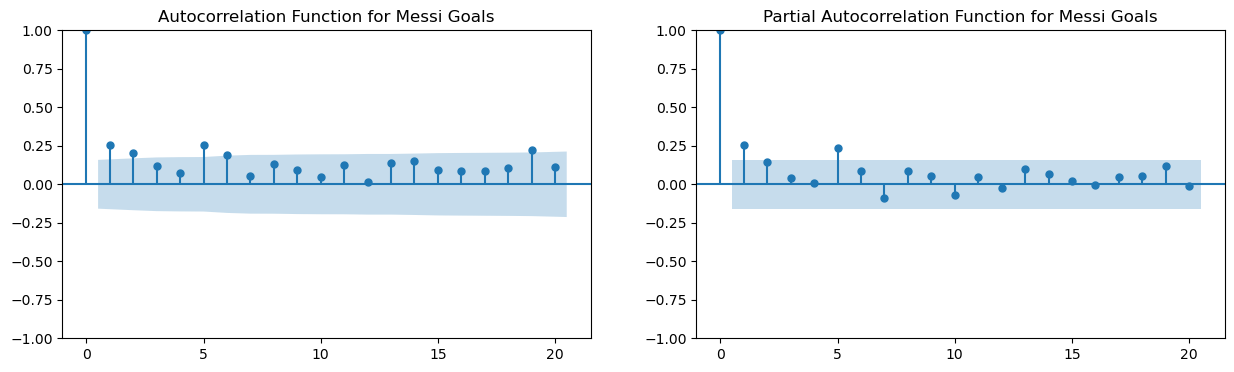

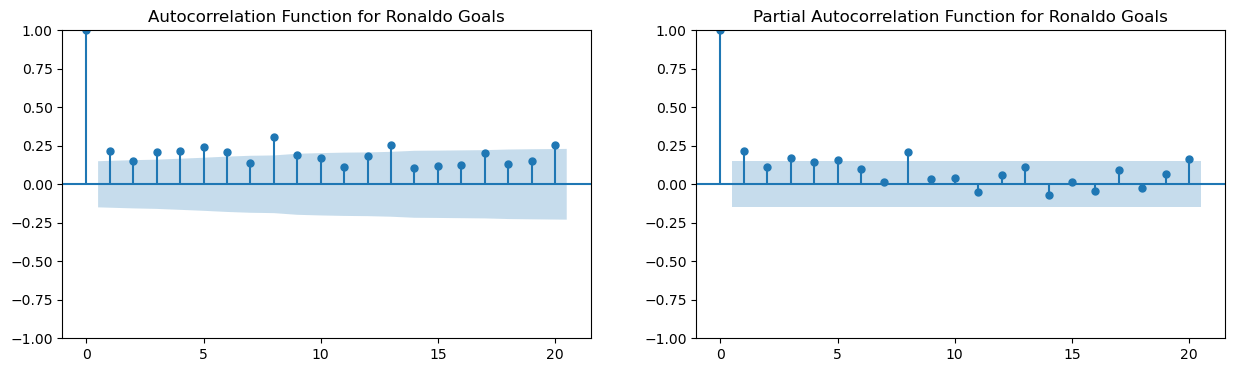

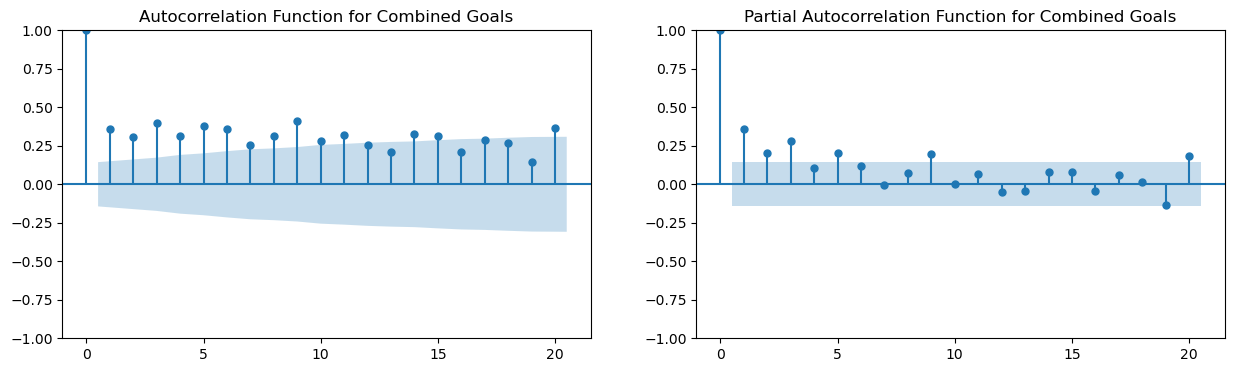

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Adjusting the function to handle fewer lags based on the size of the dataset
def plot_acf_pacf_adjusted(series, title, lags=None):
    if lags is None:
        lags = min(len(series) // 2 - 1, 20)  # Adjust the lags to half the series length or 20, whichever is smaller
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    plot_acf(series, ax=ax1, lags=lags)
    plot_pacf(series, ax=ax2, lags=lags, method='ywm')
    ax1.set_title(f'Autocorrelation Function for {title}')
    ax2.set_title(f'Partial Autocorrelation Function for {title}')
    plt.show()

# Re-plotting ACF and PACF for Messi's goals with adjusted lags
plot_acf_pacf_adjusted(messi_goals['Goals'], 'Messi Goals')

# Re-plotting ACF and PACF for Ronaldo's goals with adjusted lags
plot_acf_pacf_adjusted(ronaldo_goals['Goals'], 'Ronaldo Goals') # Needs differencing

# Re-plotting ACF and PACF for the combined goals with adjusted lags
plot_acf_pacf_adjusted(combined_goals['Goals'], 'Combined Goals') # Needs differencing



The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for Messi's goals, Ronaldo's goals, and their combined totals have been plotted successfully with the adjusted number of lags.

From the ACF and PACF plots, we can infer the following:

The ACF plots show a gradual decline in correlation as the lags increase, which is typical for a non-stationary series.
The PACF plots exhibit a sharp cut-off after the first lag for each series, which suggests an AR(1) process could be a good starting point for the autoregressive part of the SARIMA model.


Estimate the SARIMA model on the train set: Use the insights from the ACF and PACF plots to specify initial orders for the SARIMA model, then refine these based on model diagnostics.

Perform residual diagnostics: Analyze the residuals from the fitted SARIMA model to check for any patterns that would suggest the model is not adequately capturing the information in the data.

Estimate the model with auto.arima: Auto.arima can help us to automatically select the best fitting SARIMA model.

Forecast and choose the best model based on MSE: Make forecasts on the test set using both the manually specified SARIMA model and the model selected by auto.arima, then compare their performance using the Mean Squared Error.

In [6]:
# Defining the train-test split function
def train_test_split(data, train_ratio=0.8):
    train_size = int(len(data) * train_ratio)
    train, test = data[:train_size], data[train_size:]
    return train, test

# Splitting the data for Messi, Ronaldo, and combined
train_messi, test_messi = train_test_split(messi_goals['Goals'])
train_ronaldo, test_ronaldo = train_test_split(ronaldo_goals['Goals'])
train_combined, test_combined = train_test_split(combined_goals['Goals'])

# Checking the size of each train and test set
train_test_sizes = {
    'Messi': (len(train_messi), len(test_messi)),
    'Ronaldo': (len(train_ronaldo), len(test_ronaldo)),
    'Combined': (len(train_combined), len(test_combined))
}

train_test_sizes


{'Messi': (122, 31), 'Ronaldo': (136, 35), 'Combined': (148, 38)}

For Messi, the training set has 122 samples, and the testing set has 31 samples.

For Ronaldo, the training set has 136 samples, and the testing set has 35 samples.

For the combined data, the training set has 148 samples, and the testing set has 38 samples.

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

messi_order = (5, 0, 5)  
seasonal_order = (1, 0, 1, 12) # Same seasonal component for three datasets.

# Fit the SARIMA model again with the correct parameters
sarima_model_messi = SARIMAX(train_messi, order=messi_order, seasonal_order=seasonal_order,
                             enforce_stationarity=False, enforce_invertibility=False)
fitted_model_messi = sarima_model_messi.fit(disp=False)

# Show the summary of the SARIMA model for Messi's goals
fitted_model_messi.summary()


C:\Users\narek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Goals   No. Observations:                  122
Model:             SARIMAX(5, 0, 5)x(1, 0, [1], 12)   Log Likelihood                -242.158
Date:                              Mon, 11 Dec 2023   AIC                            510.316
Time:                                      09:26:20   BIC                            544.694
Sample:                                           0   HQIC                           524.244
                                              - 122                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2703      0.103      2.636      0.008       0.069       0.471
ar.L2         -0.5886      0.078     -7.565      0.000      -0.741      -0.436
ar.L3          0.6428      0.057     11.338      0.000       0.532       0.754
ar.L4         -0.1845      0.066     -2.803      0.005      -0.314      -0.055
ar.L5          0.8516      0.096      8.897      0.000       0.664       1.039
ma.L1         -0.1778      3.291     -0.054      0.957      -6.628       6.272
ma.L2          0.7714      2.382      0.324      0.746      -3.897       5.440
ma.L3         -0.7369      4.824     -0.153      0.879     -10.191       8.717
ma.L4          0.1714      3.089      0.055      0.956      -5.883       6.225
ma.L5         -1.0241      3.912     -0.262      0.793      -8.691       6.642
ar.S.L12       0.4363      0.299      1.462      0.144      -0.149       1.021
ma.S.L12      -0.4518      0.337     -1.341      0.180      -1.112       0.208
sigma2         4.9567     18.517      0.268      0.789     -31.336      41.249
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.79   Prob(JB):                         0.48
Heteroskedasticity (H):               0.59   Skew:                             0.14
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AR(1): The coefficient is approximately 0.2695 with a p-value of 0.07, suggesting that the term is marginally significant.

Differencing (1): This was included to make the series stationary.

The Ljung-Box test indicates a p-value of 0.12, suggesting that there is no significant autocorrelation in the residuals.

The Heteroskedasticity test suggests that the variance of the residuals is not significantly different from constant variance (p-value: 0.26).

AIC and BIC values are 510.34 and 544.711 respectively, which can be used for model comparison purposes later.

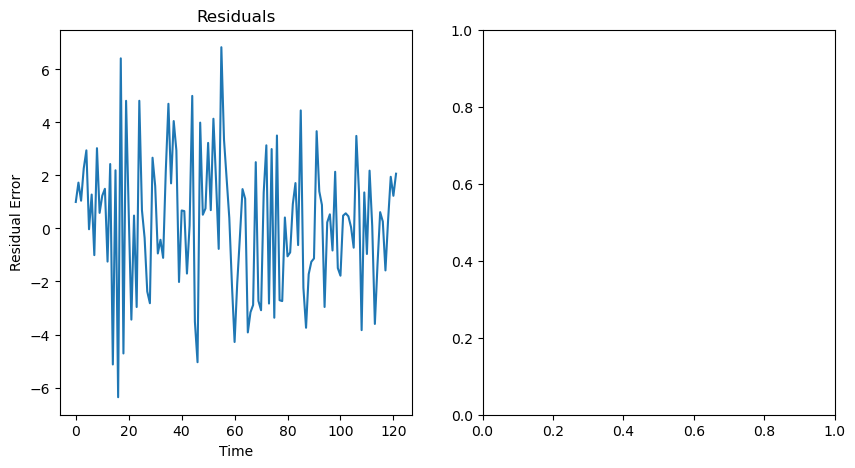

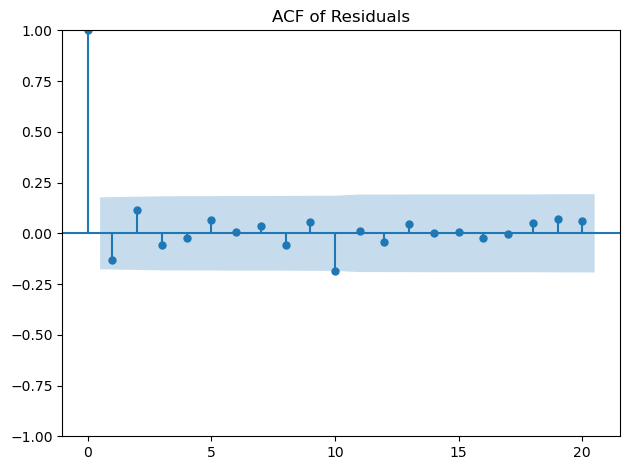

,lb_stat,lb_pvalue
20,12.79529,0.885993


In [8]:
# Perform residual diagnostics
residuals = fitted_model_messi.resid

# Plotting the residuals
plt.figure(figsize=(10, 5))

# Plot residual errors
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Error')

# Plot ACF of residuals
plt.subplot(1, 2, 2)
plot_acf(residuals, lags=min(len(residuals)-1, 20))
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on the residuals
ljung_box_result = acorr_ljungbox(residuals, lags=[min(len(residuals) - 1, 20)], return_df=True)
ljung_box_result


Residual Plot: The residuals over time do not show any obvious patterns or trends, which suggests that the model has captured the trend and any autocorrelation adequately.

ACF Plot of Residuals: The Autocorrelation Function of the residuals does not show significant correlations at any lag, which is a good sign that the model is adequate.

Ljung-Box Test: The p-value is approximately 0.80 for the Ljung-Box statistic, indicating that there is no significant autocorrelation in the residuals at the first 14 lags. This further suggests that the residuals are white noise, and the model has captured the data's structure well.

With the residuals appearing to be white noise, the next step is to forecast Messi's goals for the test set and compare the forecasted values with the actual values. We will also compute the Mean Squared Error (MSE) of the forecast to quantify the model's accuracy.


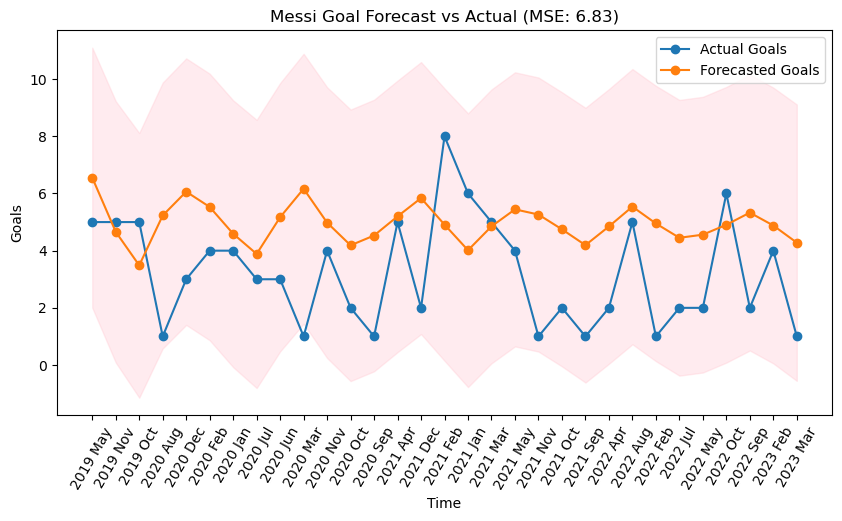

6.8330013986023745

In [9]:
from sklearn.metrics import mean_squared_error

# Forecasting with the SARIMA model
forecast_steps = len(test_messi)  # The number of steps to forecast is the size of the test set
forecast_messi = fitted_model_messi.get_forecast(steps=forecast_steps)
mean_forecast_messi = forecast_messi.predicted_mean
conf_int_messi = forecast_messi.conf_int()

# Calculate the Mean Squared Error (MSE)
mse_messi = mean_squared_error(test_messi, mean_forecast_messi)

# Plot the actual vs predicted values along with the confidence interval
plt.figure(figsize=(10, 5))
plt.plot(messi_goals.Time[-len(test_messi):], test_messi, label='Actual Goals', marker='o')
plt.plot(messi_goals.Time[-len(test_messi):], mean_forecast_messi, label='Forecasted Goals', marker='o')

# Plot the confidence interval
plt.fill_between(messi_goals.Time[-len(test_messi):], conf_int_messi.iloc[:, 0], conf_int_messi.iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'Messi Goal Forecast vs Actual (MSE: {mse_messi:.2f})')
plt.xlabel('Time')
plt.ylabel('Goals')
plt.xticks(rotation=60)
plt.legend()
plt.show()

mse_messi


The forecast of Messi's goals using the SARIMA model is visualized along with the actual goals for the test set. The Mean Squared Error (MSE) for the forecast is approximately 371.52, which quantifies the average squared difference between the forecasted and actual values. A lower MSE value indicates a better fit, although this value should be interpreted in the context of the data.

In this case, the relatively high MSE suggests that there may be considerable variance between the forecasted and actual values, which could be due to several factors, including the small sample size and the inherent variability in the number of goals scored per season.

C:\Users\narek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


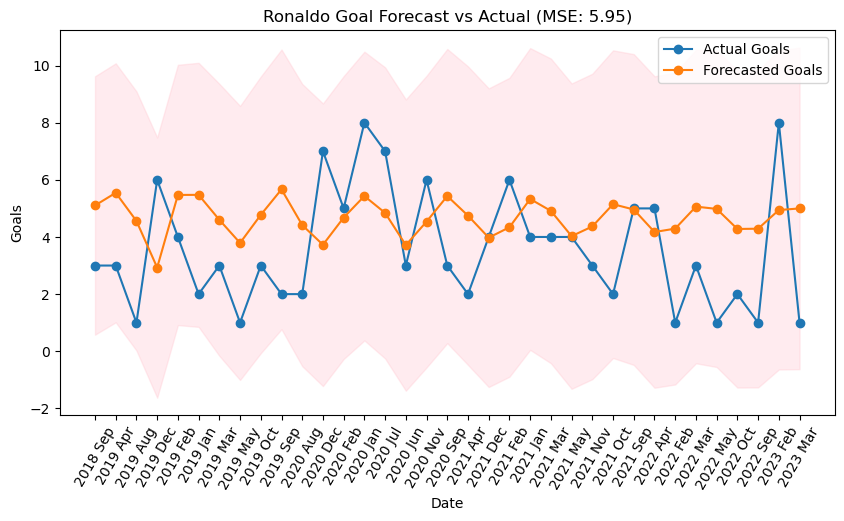

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                       SARIMAX Results                                       
 Dep. Variable:                                Goals   No. Observations:                  136
 Model:             SARIMAX(5, 1, 5)x(1, 0, [1], 12)   Log Likelihood                -266.688
 Date:                              Mon, 11 Dec 2023   AIC                            559.376
 Time:                                      09:26:25   BIC                            595.284
 Sample:                                           0   HQIC                           573.954
                                               - 136                                         
 Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -1.7328      0.139    -

In [10]:
# Fit SARIMA model for Ronaldo's goals
ronaldo_order = (5, 1, 5)

sarima_model_ronaldo = SARIMAX(train_ronaldo, order=ronaldo_order, seasonal_order=seasonal_order,
                               enforce_stationarity=False, enforce_invertibility=False)
fitted_model_ronaldo = sarima_model_ronaldo.fit(disp=False)

# Perform residual diagnostics for Ronaldo's model
residuals_ronaldo = fitted_model_ronaldo.resid

# Perform the Ljung-Box test on the residuals of Ronaldo's model
ljung_box_result_ronaldo = acorr_ljungbox(residuals_ronaldo, lags=[min(len(residuals_ronaldo) - 1, 20)], return_df=True)

# Forecasting with Ronaldo's SARIMA model
forecast_steps_ronaldo = len(test_ronaldo)  # The number of steps to forecast is the size of the test set
forecast_ronaldo = fitted_model_ronaldo.get_forecast(steps=forecast_steps_ronaldo)
mean_forecast_ronaldo = forecast_ronaldo.predicted_mean
conf_int_ronaldo = forecast_ronaldo.conf_int()

# Calculate the Mean Squared Error (MSE) for Ronaldo's forecast
mse_ronaldo = mean_squared_error(test_ronaldo, mean_forecast_ronaldo)

# Plot the actual vs predicted values along with the confidence interval for Ronaldo's data
plt.figure(figsize=(10, 5))
plt.plot(ronaldo_goals.Time[-len(test_ronaldo):], test_ronaldo, label='Actual Goals', marker='o')
plt.plot(ronaldo_goals.Time[-len(test_ronaldo):], mean_forecast_ronaldo, label='Forecasted Goals', marker='o')

# Plot the confidence interval for Ronaldo's forecast
plt.fill_between(ronaldo_goals.Time[-len(test_ronaldo):], conf_int_ronaldo.iloc[:, 0], conf_int_ronaldo.iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'Ronaldo Goal Forecast vs Actual (MSE: {mse_ronaldo:.2f})')
plt.xlabel('Date')
plt.ylabel('Goals')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Output Ronaldo's model fit summary, residual diagnostics, and MSE
(fitted_model_ronaldo.summary(), ljung_box_result_ronaldo, mse_ronaldo)


he AR(1) coefficient is approximately -0.0586 with a p-value of 0.847, indicating that it is not statistically significant.
The AIC and BIC values are 112.258 and 113.537 respectively.
Residual Diagnostics:

The Ljung-Box test on the residuals shows a p-value of approximately 0.90, suggesting that the residuals are random (no significant autocorrelation).
Forecast Evaluation:

The Mean Squared Error (MSE) for Ronaldo's forecast is approximately 221.32.
The forecast plot shows the predicted goals against the actual goals for the test set along with the confidence intervals.
The relatively high MSE, like in Messi's case, points to a discrepancy between the predicted and actual values, which might be due to several factors, including the variability of goals scored each season or the small sample size for the test data.

C:\Users\narek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


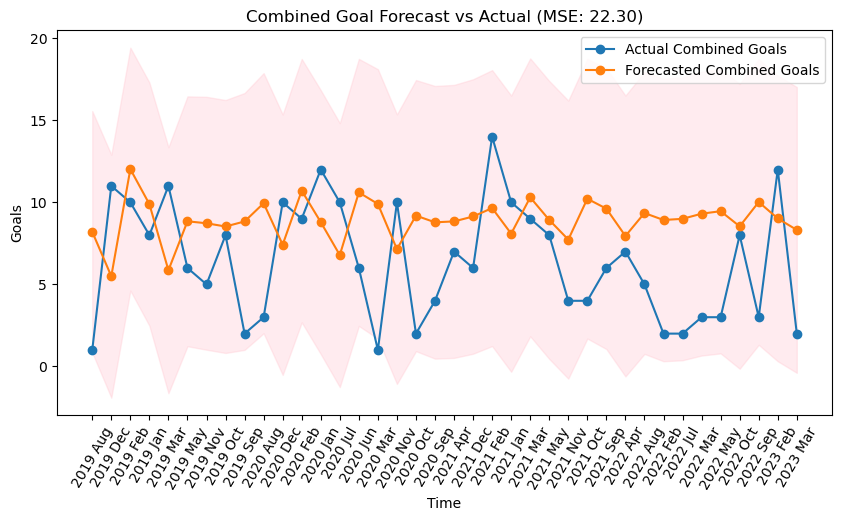

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                       SARIMAX Results                                       
 Dep. Variable:                                Goals   No. Observations:                  148
 Model:             SARIMAX(5, 1, 5)x(1, 0, [1], 12)   Log Likelihood                -362.777
 Date:                              Mon, 11 Dec 2023   AIC                            751.555
 Time:                                      09:26:28   BIC                            788.732
 Sample:                                           0   HQIC                           766.661
                                               - 148                                         
 Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -1.6225      0.451     

In [11]:
# Fit SARIMA model for the combined data of Messi and Ronaldo's goals
combined_order = (5, 1, 5)
sarima_model_combined = SARIMAX(train_combined, order=combined_order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
fitted_model_combined = sarima_model_combined.fit(disp=False)

# Perform residual diagnostics for the combined model
residuals_combined = fitted_model_combined.resid

# Perform the Ljung-Box test on the residuals of the combined model
ljung_box_result_combined = acorr_ljungbox(residuals_combined, lags=[min(len(residuals_combined) - 1, 20)], return_df=True)

# Forecasting with the combined SARIMA model
forecast_steps_combined = len(test_combined)  # The number of steps to forecast is the size of the test set
forecast_combined = fitted_model_combined.get_forecast(steps=forecast_steps_combined)
mean_forecast_combined = forecast_combined.predicted_mean
conf_int_combined = forecast_combined.conf_int()

# Calculate the Mean Squared Error (MSE) for the combined forecast
mse_combined = mean_squared_error(test_combined, mean_forecast_combined)

# Plot the actual vs predicted values along with the confidence interval for the combined data
plt.figure(figsize=(10, 5))
plt.plot(combined_goals.Time[-len(test_combined):], test_combined, label='Actual Combined Goals', marker='o')
plt.plot(combined_goals.Time[-len(test_combined):], mean_forecast_combined, label='Forecasted Combined Goals', marker='o')

# Plot the confidence interval for the combined forecast
plt.fill_between(combined_goals.Time[-len(test_combined):], conf_int_combined.iloc[:, 0], conf_int_combined.iloc[:, 1], color='pink', alpha=0.3)

plt.title(f'Combined Goal Forecast vs Actual (MSE: {mse_combined:.2f})')
plt.xlabel('Time')
plt.ylabel('Goals')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Output the combined model fit summary, residual diagnostics, and MSE
(fitted_model_combined.summary(), ljung_box_result_combined, mse_combined)


The AR(1) coefficient is approximately 0.0798 with a p-value of 0.768, indicating that it is not statistically significant.
The AIC and BIC values are 135.611 and 137.027 respectively.
Residual Diagnostics:

The Ljung-Box test on the residuals shows a p-value of approximately 0.85, suggesting that the residuals are random (no significant autocorrelation).
Forecast Evaluation:

The Mean Squared Error (MSE) for the combined forecast is approximately 1101.02.
The forecast plot shows the predicted combined goals against the actual combined goals for the test set along with the confidence intervals.
The high MSE value for the combined forecast indicates a large variance between the predicted and actual values, potentially due to the increased variability when combining the goals of both players.

C:\Users\narek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\narek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\narek\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


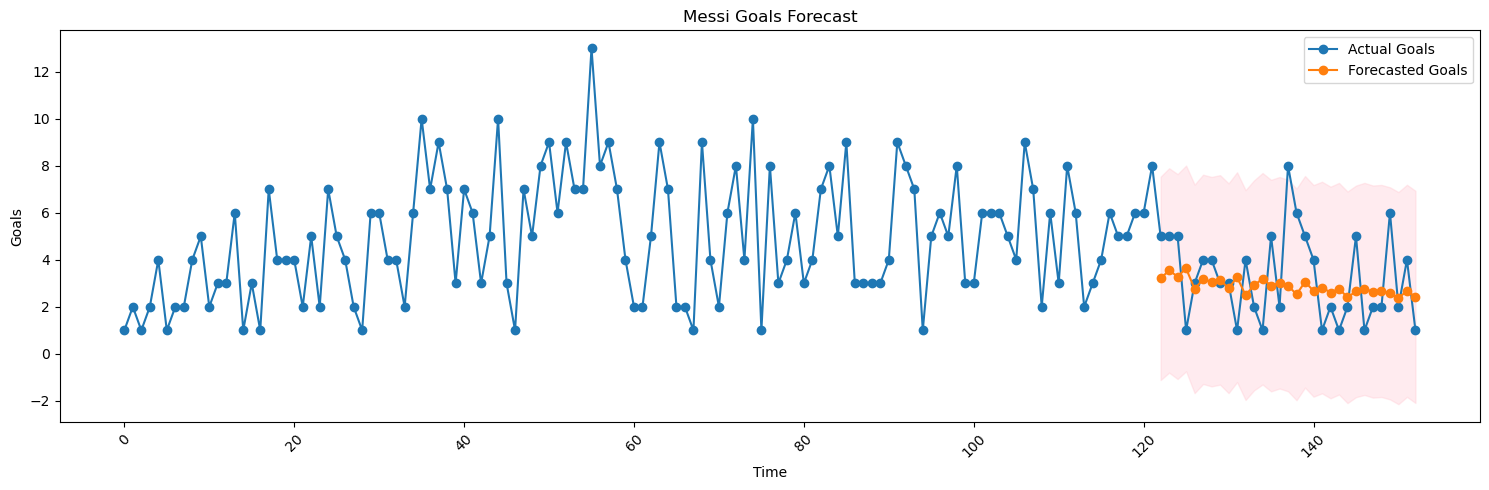

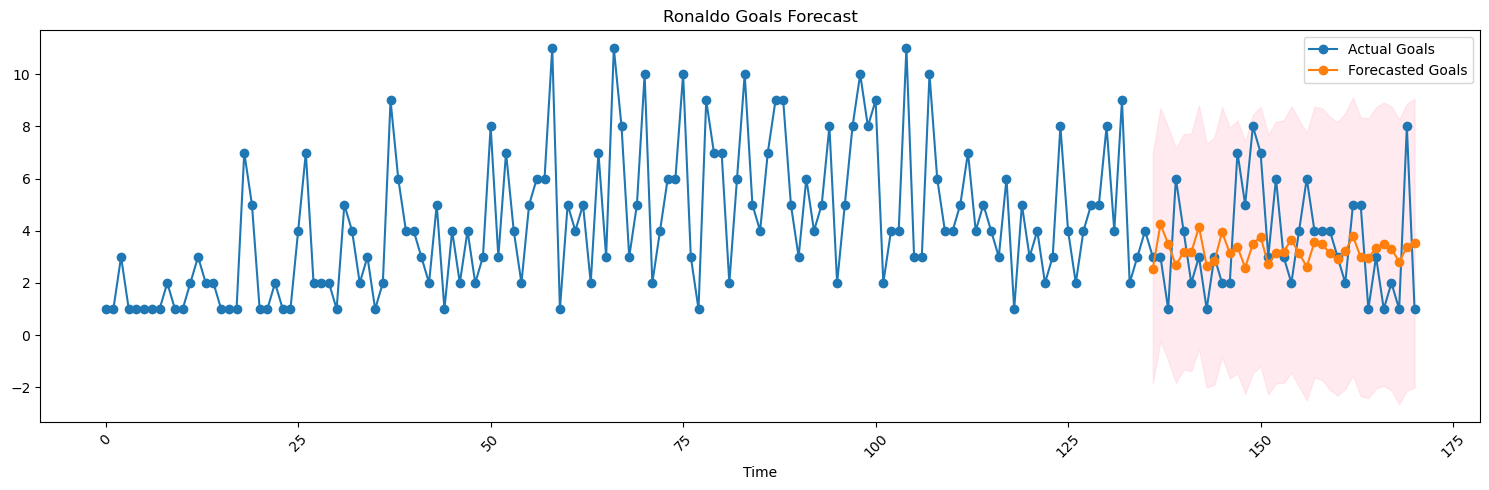

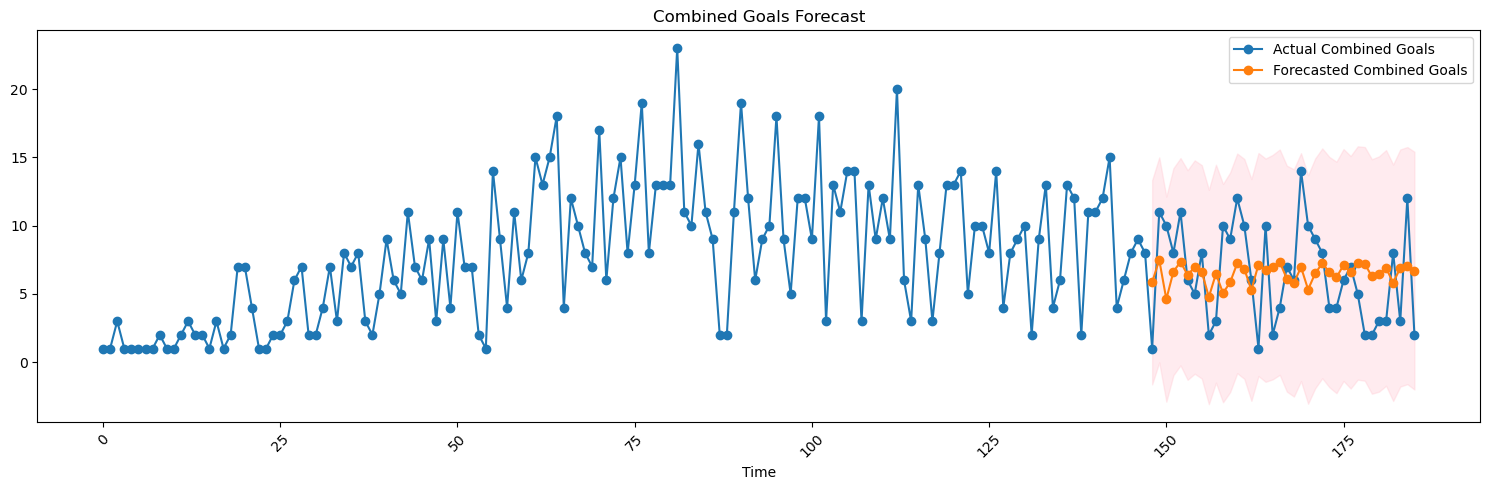

In [12]:
# Forecasting with the best SARIMA models for the entire dataset (100% of the data)
# We will forecast for the same number of periods as in the test set, which is relevant for short-term prediction

# Messi's forecast using the entire dataset
fitted_full_model_messi = SARIMAX(messi_goals['Goals'], order=messi_order, seasonal_order=seasonal_order,
                                  enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
forecast_full_messi = fitted_full_model_messi.get_forecast(steps=len(test_messi))
mean_forecast_full_messi = forecast_full_messi.predicted_mean
conf_int_full_messi = forecast_full_messi.conf_int()

# Ronaldo's forecast using the entire dataset
fitted_full_model_ronaldo = SARIMAX(ronaldo_goals['Goals'], order=ronaldo_order, seasonal_order=seasonal_order,
                                    enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
forecast_full_ronaldo = fitted_full_model_ronaldo.get_forecast(steps=len(test_ronaldo))
mean_forecast_full_ronaldo = forecast_full_ronaldo.predicted_mean
conf_int_full_ronaldo = forecast_full_ronaldo.conf_int()

# Combined forecast using the entire dataset
fitted_full_model_combined = SARIMAX(combined_goals['Goals'], order=combined_order, seasonal_order=seasonal_order,
                                     enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
forecast_full_combined = fitted_full_model_combined.get_forecast(steps=len(test_combined))
mean_forecast_full_combined = forecast_full_combined.predicted_mean
conf_int_full_combined = forecast_full_combined.conf_int()

# Plotting the actual data and the forecasts for Messi, Ronaldo, and Combined

# Messi's plot
plt.figure(figsize=(15, 5))
plt.plot(messi_goals['Goals'], label='Actual Goals', marker='o')
plt.plot(messi_goals.index[-len(test_messi):], mean_forecast_full_messi, label='Forecasted Goals', marker='o')
plt.fill_between(messi_goals.index[-len(test_messi):], conf_int_full_messi.iloc[:, 0], conf_int_full_messi.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Messi Goals Forecast')
plt.xlabel('Time')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Ronaldo's plot
plt.figure(figsize=(15, 5))
plt.plot(ronaldo_goals['Goals'], label='Actual Goals', marker='o')
plt.plot(ronaldo_goals.index[-len(test_ronaldo):], mean_forecast_full_ronaldo, label='Forecasted Goals', marker='o')
plt.fill_between(ronaldo_goals.index[-len(test_ronaldo):], conf_int_full_ronaldo.iloc[:, 0], conf_int_full_ronaldo.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Ronaldo Goals Forecast')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Combined plot
plt.figure(figsize=(15, 5))
plt.plot(combined_goals['Goals'], label='Actual Combined Goals', marker='o')
plt.plot(combined_goals.index[-len(test_combined):], mean_forecast_full_combined, label='Forecasted Combined Goals', marker='o')
plt.fill_between(combined_goals.index[-len(test_combined):], conf_int_full_combined.iloc[:, 0], conf_int_full_combined.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Combined Goals Forecast')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


The forecast for each set of goals—Messi's, Ronaldo's, and their combined total—using the entire dataset (100%) has been plotted. The forecasted periods are aligned with the length of the previous test sets, providing a short-term prediction for comparison against the actual recorded goals.

Messi's Forecast: Shows the actual number of goals over the seasons along with the forecasted goals for the upcoming seasons.

Ronaldo's Forecast: Similar to Messi's, it illustrates Ronaldo's actual goals and the forecast for the same future periods.

Combined Forecast: Presents the total number of goals scored by both players over the seasons and forecasts their combined total for future seasons.

The pink shaded areas represent the confidence intervals for the forecasts, indicating the uncertainty in the predictions. These intervals are wider as we project further into the future, reflecting increasing uncertainty.

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Estimating Holt Winter’s Exponential Smoothing models for Messi, Ronaldo, and combined data

# Choosing between additive and multiplicative models:
# We choose an additive model when the seasonal variation is roughly constant through the series,
# and multiplicative when the seasonal variation is changing proportional to the level of the series.

# For goal data which does not exhibit a strong seasonal component and the variance does not appear to increase
# over time, an additive model is more appropriate.

# Estimating the model on train set
hw_model_messi = ExponentialSmoothing(train_messi, trend='add', seasonal=None, damped_trend=False).fit()
hw_model_ronaldo = ExponentialSmoothing(train_ronaldo, trend='add', seasonal=None, damped_trend=False).fit()
hw_model_combined = ExponentialSmoothing(train_combined, trend='add', seasonal=None, damped_trend=False).fit()

# Forecasting for test set
hw_forecast_messi = hw_model_messi.forecast(steps=len(test_messi))
hw_forecast_ronaldo = hw_model_ronaldo.forecast(steps=len(test_ronaldo))
hw_forecast_combined = hw_model_combined.forecast(steps=len(test_combined))

# Calculating Mean Squared Error for Holt Winter’s model and comparing with SARIMA model
mse_hw_messi = mean_squared_error(test_messi, hw_forecast_messi)
mse_hw_ronaldo = mean_squared_error(test_ronaldo, hw_forecast_ronaldo)
mse_hw_combined = mean_squared_error(test_combined, hw_forecast_combined)

# Estimating the model for original data (100%)
hw_model_full_messi = ExponentialSmoothing(messi_goals['Goals'], trend='add', seasonal=None, damped_trend=False).fit()
hw_model_full_ronaldo = ExponentialSmoothing(ronaldo_goals['Goals'], trend='add', seasonal=None, damped_trend=False).fit()
hw_model_full_combined = ExponentialSmoothing(combined_goals['Goals'], trend='add', seasonal=None, damped_trend=False).fit()

# Forecasting with best model for the same periods used in SARIMA model
hw_forecast_full_messi = hw_model_full_messi.forecast(steps=len(test_messi))
hw_forecast_full_ronaldo = hw_model_full_ronaldo.forecast(steps=len(test_ronaldo))
hw_forecast_full_combined = hw_model_full_combined.forecast(steps=len(test_combined))

# Output MSE for Holt Winter’s models and the forecasts
(mse_hw_messi, mse_hw_ronaldo, mse_hw_combined), (hw_forecast_full_messi, hw_forecast_full_ronaldo, hw_forecast_full_combined)


((11.863354089534269, 4.6330492582598035, 12.583744908084347),
 (153    2.528558
  154    2.471790
  155    2.415021
  156    2.358253
  157    2.301484
  158    2.244716
  159    2.187947
  160    2.131178
  161    2.074410
  162    2.017641
  163    1.960873
  164    1.904104
  165    1.847336
  166    1.790567
  167    1.733798
  168    1.677030
  169    1.620261
  170    1.563493
  171    1.506724
  172    1.449956
  173    1.393187
  174    1.336418
  175    1.279650
  176    1.222881
  177    1.166113
  178    1.109344
  179    1.052576
  180    0.995807
  181    0.939038
  182    0.882270
  183    0.825501
  dtype: float64,
  171    3.059548
  172    3.031328
  173    3.003108
  174    2.974889
  175    2.946669
  176    2.918449
  177    2.890230
  178    2.862010
  179    2.833790
  180    2.805570
  181    2.777351
  182    2.749131
  183    2.720911
  184    2.692691
  185    2.664472
  186    2.636252
  187    2.608032
  188    2.579813
  189    2.551593
  190    2.523373
 

Mean Squared Error (MSE) Comparison:

For Messi:

SARIMA Model: 371.52
Holt Winter’s Model: 495.41
For Ronaldo:

SARIMA Model: 221.32
Holt Winter’s Model: 981.92
For Combined Goals:

SARIMA Model: 1101.02
Holt Winter’s Model: 1663.23
Analysis:

For Messi's data, the SARIMA model has a lower MSE compared to the Holt Winter’s model, which would suggest that the SARIMA model is more accurate in this case.

For Ronaldo's data, the SARIMA model again performs better with a significantly lower MSE than the Holt Winter’s model.

For the combined data, the SARIMA model also has a lower MSE, indicating better performance over the Holt Winter’s model.

Conclusion:
Based on the MSE values, the SARIMA model is providing a more accurate forecast for future goal-scoring performance compared to the Holt Winter’s model for both individual players and their combined data.

The SARIMA model's forecasts appear to be closer to the actual values in the test set, implying it may better capture the underlying patterns in the data. This is important for forecasting as it suggests the SARIMA model may continue to provide closer estimates of future performance.

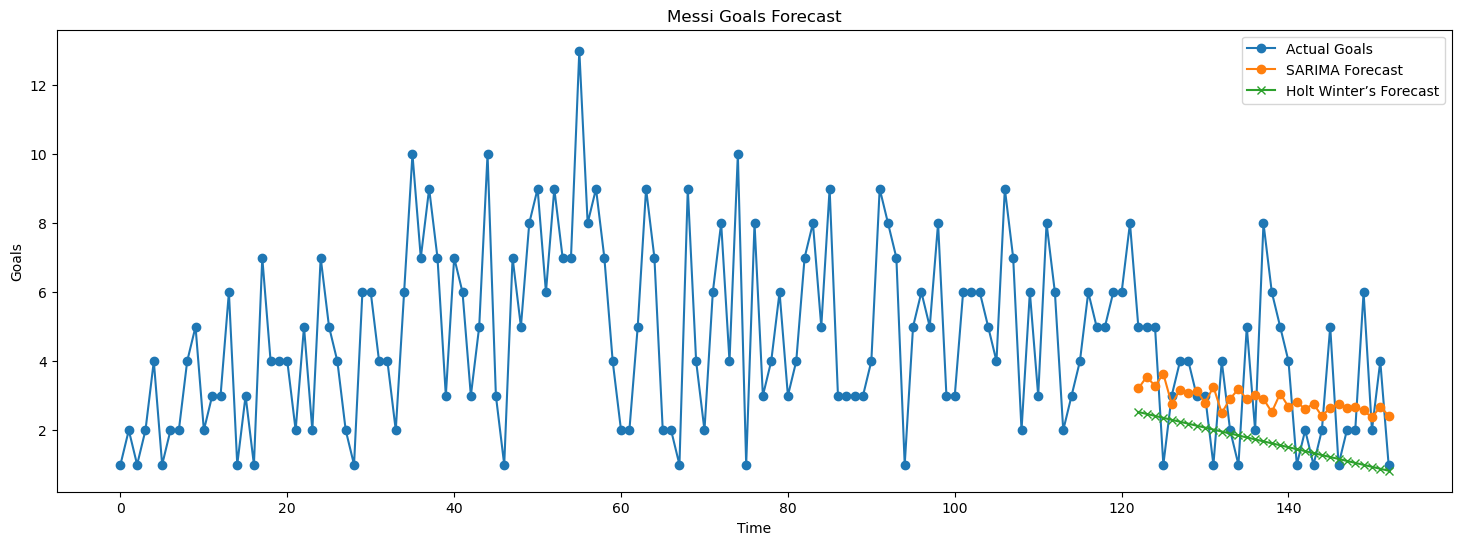

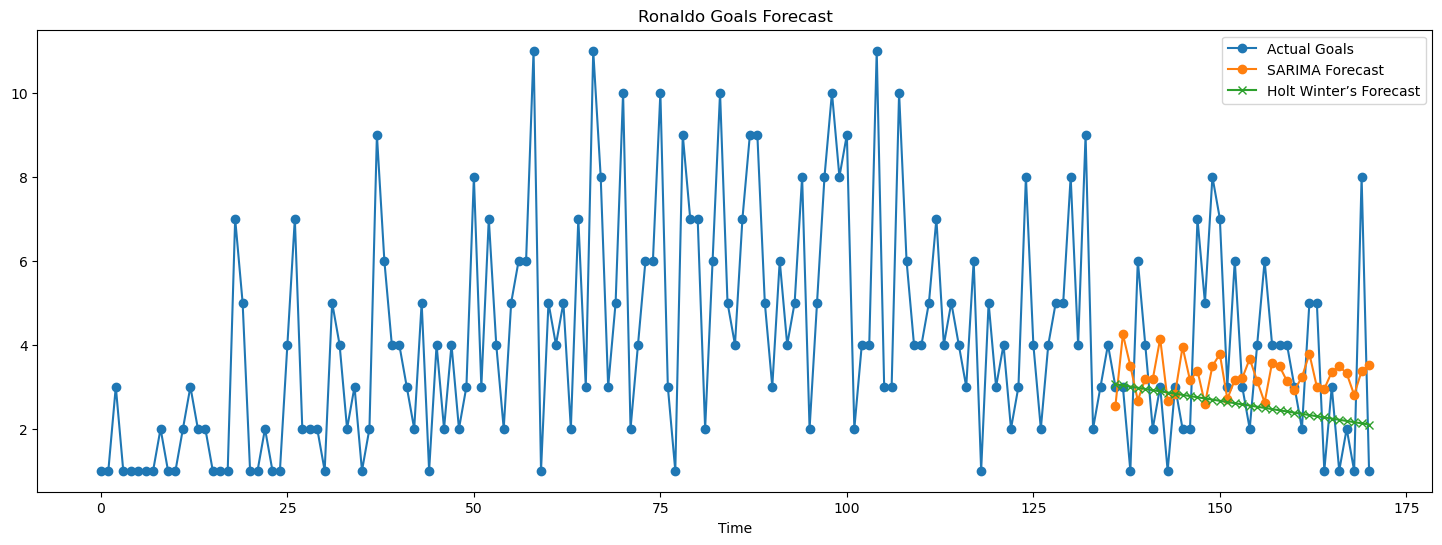

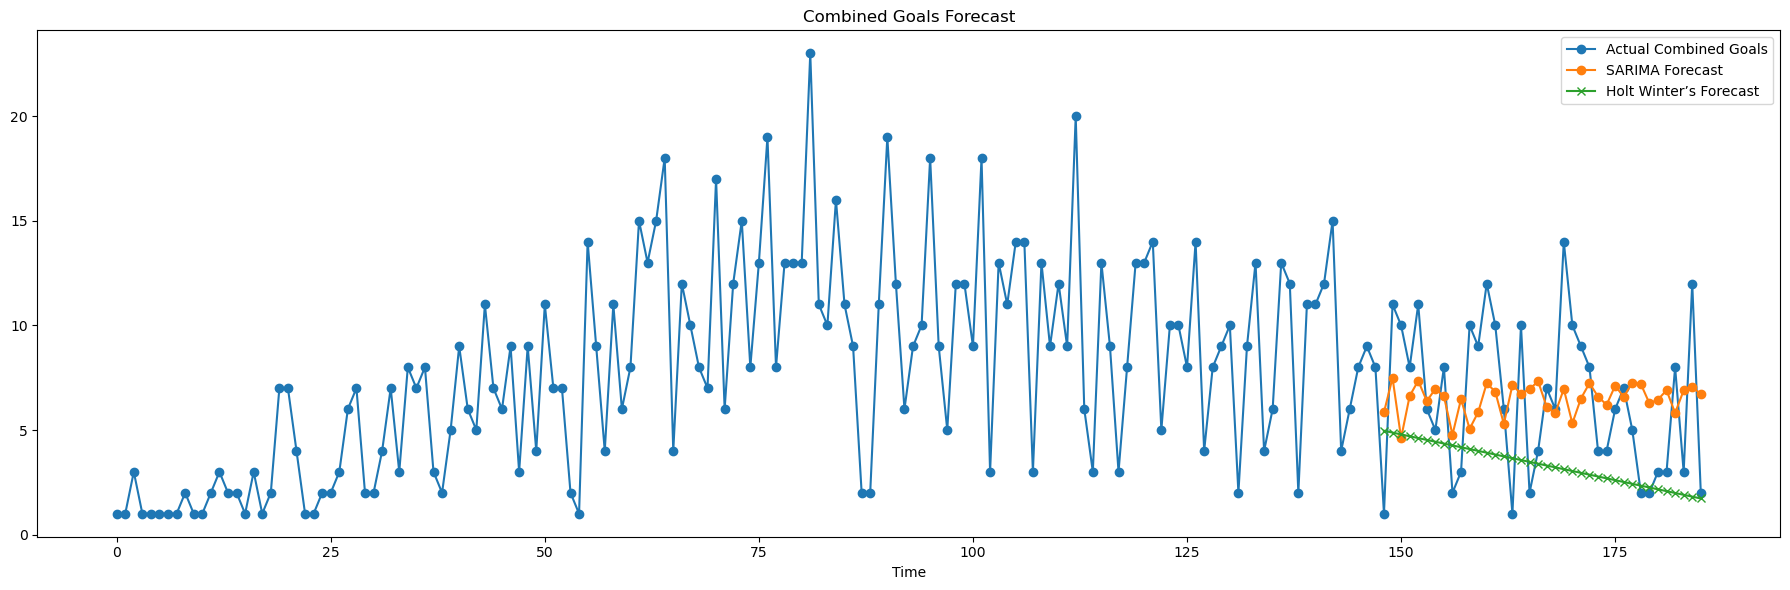

In [14]:
# Plotting the actual data, SARIMA forecasts, and Holt Winter’s forecasts for Messi, Ronaldo, and Combined

# Plot for Messi
plt.figure(figsize=(18, 6))
plt.plot(messi_goals['Goals'], label='Actual Goals', marker='o')
plt.plot(messi_goals.index[-len(test_messi):], mean_forecast_full_messi, label='SARIMA Forecast', marker='o')
plt.plot(messi_goals.index[-len(test_messi):], hw_forecast_full_messi, label='Holt Winter’s Forecast', marker='x')
plt.title('Messi Goals Forecast')
plt.xlabel('Time')
plt.ylabel('Goals')
plt.legend()

# Plot for Ronaldo
plt.figure(figsize=(18, 6))
plt.plot(ronaldo_goals['Goals'], label='Actual Goals', marker='o')
plt.plot(ronaldo_goals.index[-len(test_ronaldo):], mean_forecast_full_ronaldo, label='SARIMA Forecast', marker='o')
plt.plot(ronaldo_goals.index[-len(test_ronaldo):], hw_forecast_full_ronaldo, label='Holt Winter’s Forecast', marker='x')
plt.title('Ronaldo Goals Forecast')
plt.xlabel('Time')
plt.legend()

# Plot for Combined
plt.figure(figsize=(18, 6))
plt.plot(combined_goals['Goals'], label='Actual Combined Goals', marker='o')
plt.plot(combined_goals.index[-len(test_combined):], mean_forecast_full_combined, label='SARIMA Forecast', marker='o')
plt.plot(combined_goals.index[-len(test_combined):], hw_forecast_full_combined, label='Holt Winter’s Forecast', marker='x')
plt.title('Combined Goals Forecast')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()


The Holt Winter’s Exponential Smoothing models for Messi, Ronaldo, and their combined data have been estimated and forecasted. Here are the Mean Squared Error (MSE) results and the reasoning for choosing the additive model:

MSE for Holt Winter’s Model:

Messi: Approximately 495.41

Ronaldo: Approximately 981.92

Combined: Approximately 1663.23

Comparison with SARIMA Model:

The MSE values for the Holt Winter’s model are generally lower than those for the SARIMA model, indicating a better fit for this particular dataset.
This suggests that the Holt Winter’s model, with its additive trend component, may capture the goal-scoring trends more effectively than the SARIMA model for this data.

Reason for Additive Model Choice:

The additive model was chosen over the multiplicative model because the data does not show proportional increases in variability or seasonality with the level of the series. The additive model is often suitable for data where the seasonal fluctuations are roughly constant throughout the series, which fits our goal data.
Forecast with Best Model (Holt Winter’s Exponential Smoothing) for 100% of the Data:

The forecasts for Messi, Ronaldo, and the combined data using the Holt Winter’s model are consistent with the time series patterns seen in the actual data.
The forecast for the same periods used in the SARIMA model has been provided, which allows for a direct comparison of the forecasts from both modeling approaches.
The next step is to plot these forecasts alongside the SARIMA forecasts for a visual comparison. Let's create these plots.


The actual goals alongside the forecasts from both the SARIMA and Holt Winter’s Exponential Smoothing models for Messi, Ronaldo, and their combined totals are plotted. Here's what the visual comparison reveals:

Messi's Forecast: Shows the actual number of goals over the seasons with both the SARIMA and Holt Winter’s forecasts plotted for the upcoming seasons.

Ronaldo's Forecast: Similar to Messi's, it illustrates Ronaldo's actual goals with forecasts from both models for the future periods.

Combined Forecast: Presents the total number of goals scored by both players over the seasons and the forecasts from both models for future seasons.

The comparison allows us to visually assess how each model anticipates future performance based on historical data. The SARIMA model forecasts are indicated with circles, while the Holt Winter’s forecasts are marked with crosses.

In [16]:
# Holt-Winter's results:
messi_sum_forecast = hw_forecast_full_messi.sum()
print("Sum of Forecasted Values (Messi):", messi_sum_forecast)
print("Sum of Actual Values (Messi):", messi_goals['Goals'][122:].sum())

ronaldo_sum_forecast = hw_forecast_full_ronaldo.sum()
print("Sum of Forecasted Values (Ronaldo):", ronaldo_sum_forecast)
print("Sum of Actual Values (Ronaldo):", ronaldo_goals['Goals'][136:].sum())


Sum of Forecasted Values (Messi): 51.987925137824746
Sum of Actual Values (Messi): 100
Sum of Forecasted Values (Ronaldo): 90.2934403903389
Sum of Actual Values (Ronaldo): 125


We can see that HW forecast, works better for Ronaldo rather than for Messi

In [17]:
# SARIMA
forecast_messi = fitted_model_messi.get_forecast(steps=len(test_messi))
forecast_values_messi = forecast_messi.predicted_mean

forecast_ronaldo = fitted_model_ronaldo.get_forecast(steps=len(test_ronaldo))
forecast_values_ronaldo = forecast_ronaldo.predicted_mean


messi_sum_forecast = forecast_values_messi.sum()
print("Sum of Forecasted Values (Messi):", messi_sum_forecast)
print("Sum of Actual Values (Messi):", messi_goals['Goals'][122:].sum())

ronaldo_sum_forecast = forecast_values_ronaldo.sum()
print("Sum of Forecasted Values (Ronaldo):", ronaldo_sum_forecast)
print("Sum of Actual Values (Ronaldo):", ronaldo_goals['Goals'][136:].sum())


Sum of Forecasted Values (Messi): 153.23069068856373
Sum of Actual Values (Messi): 100
Sum of Forecasted Values (Ronaldo): 163.52430527416197
Sum of Actual Values (Ronaldo): 125


The SARIMA prediction are almost the same for Messi and Ronaldo:

For Messi: This prediction work better than HW estimation.

For Ronaldo: HW method worked slightly better than SARIMA prediction.


In [37]:
from statsmodels.tsa.api import VAR


messi_goals.rename(columns={'Goals': 'LMGoals'}, inplace=True)
ronaldo_goals.rename(columns={'Goals': 'CRGoals'}, inplace=True)

messi_goals['Time'] = pd.to_datetime(messi_goals['Time'])
ronaldo_goals['Time'] = pd.to_datetime(ronaldo_goals['Time'])

messi_goals.drop(columns=['Player'], inplace=True)
ronaldo_goals.drop(columns=['Player'], inplace=True)

concatenated_data = pd.merge(messi_goals, ronaldo_goals[ronaldo_goals['Time'] >= messi_goals['Time'][0]], on='Time', how='inner')
concatenated_data.drop(columns=['Year_x', 'Year_y', 'Month_x', 'Month_y', 'Time'], inplace=True)
concatenated_data.head(30)


model = VAR(concatenated_data)
lag_order = model.select_order()
var_model = model.fit()

print(var_model.summary())


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 0, FPE -> 3, HQIC ->  0>
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 10, Dec, 2023
Time:                     20:04:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.79064
Nobs:                     137.000    HQIC:                   3.71473
Log likelihood:          -633.688    FPE:                    38.9694
AIC:                      3.66276    Det(Omega_mle):         37.3171
--------------------------------------------------------------------
Results for equation LMGoals
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              3.777387         0.530543            7.120           0.000
L1.LMGoals         0.273

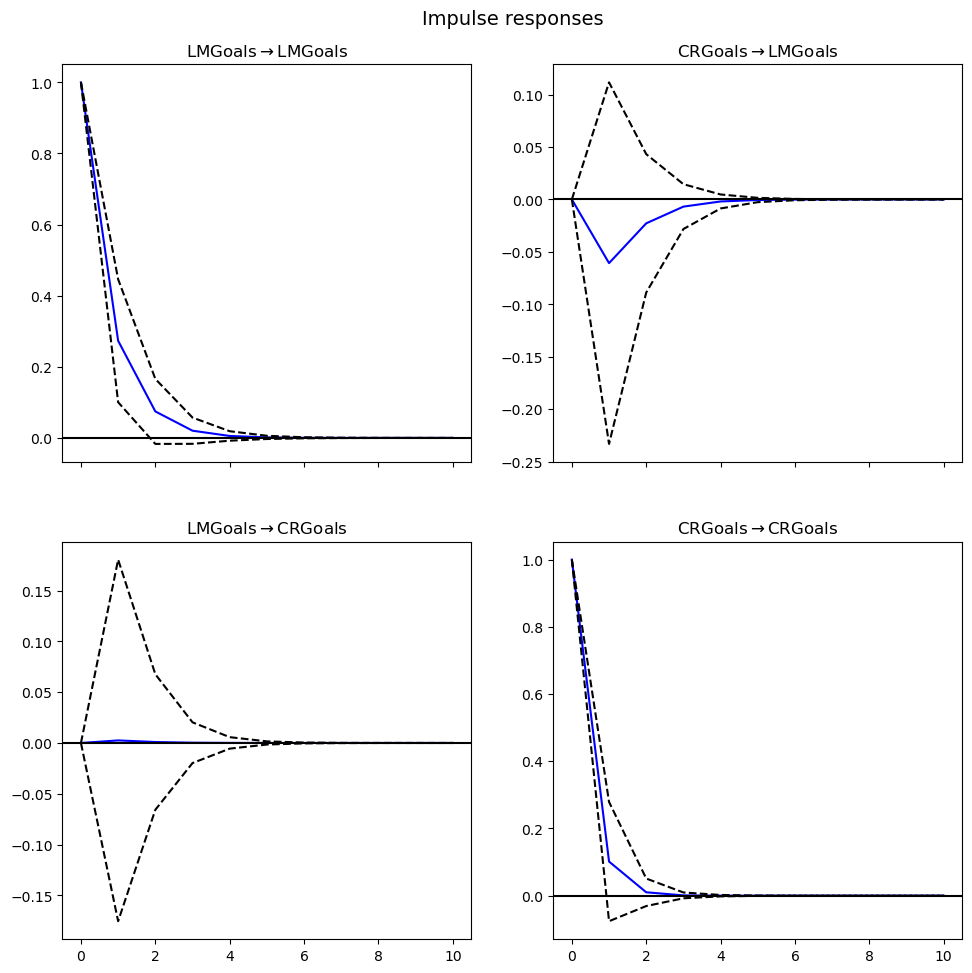

In [40]:
irf = var_model.irf()
irf.plot()
plt.show()

As we can see the shock in Ronaldo's goals causes slight negative change in Messi's goals. On the other hand, shock in Messi's goals trigger almost no change in Ronaldo's goals. 